In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SE_size_factor = 0.02
lam_factor = 5
area_factor = 0.03
connectivity = 4
min_thres = 1
max_thres = 255
stepsize = 10
#min_thres = 125
#max_thres = 125
#stepsize=1
perc = 0.6
lam = 45

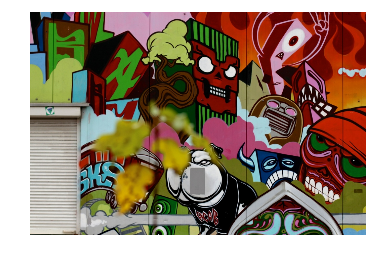

In [4]:
#Load the image
path_to_image = '../tests/images/Color/color.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
#our detection object
det = sr.MSSRDetector(
            min_thres=min_thres, max_thres=max_thres, step=stepsize,
            perc=perc, SE_size_factor=SE_size_factor,
            lam_factor=lam_factor,
            area_factor=area_factor,
            connectivity=connectivity)

In [6]:
# detection
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
print(det.lam, det.SE.shape)#, lam

45 (17, 17)


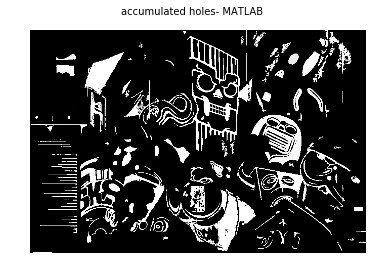

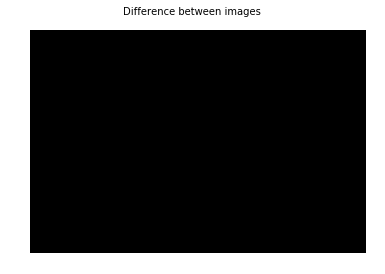

True


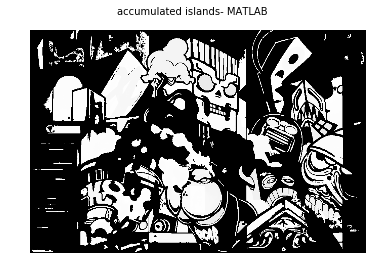

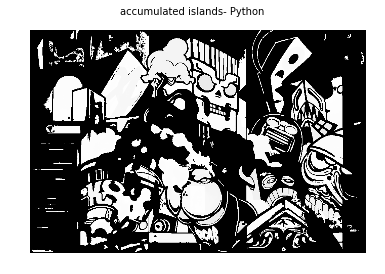

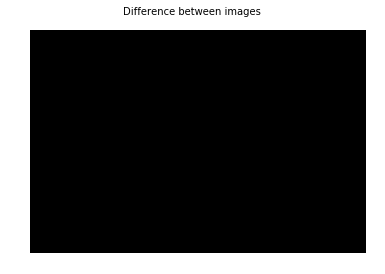

True
number of different pixels: 0


In [7]:
# load MAT files with the accumulated (in this case over a single binary image) islands and holes
matfile = sio.loadmat('../tests/features/Color/holes_acc.mat')
mat_holes = matfile['holes_acc']
sr.show_image(mat_holes*255, 'accumulated holes- MATLAB' )
print(sr.image_diff(det.regions_sum['holes'],mat_holes ))
matfile = sio.loadmat('../tests/features/Color/islands_acc.mat')
mat_islands = matfile['islands_acc']
sr.show_image(mat_islands*255, 'accumulated islands- MATLAB' )
sr.show_image(det.regions_sum['islands']*255, 'accumulated islands- Python' )
print(sr.image_diff(det.regions_sum['islands']*255,mat_islands*255 ))
#print "py_islands_acc: ",(det.regions_sum['islands'][250:270,100:120])
#print "mat_islands_acc: ",(mat_islands)[250:270,100:120]
print("number of different pixels:", (det.regions_sum['islands']-mat_islands).sum())

In [8]:
matfile = sio.loadmat('../tests/features/Color/color_allregions.mat')
masks = matfile['saliency_masks'] * 255
holes_matlab = masks[:,:, 0]
islands_matlab = masks[:,:, 1]

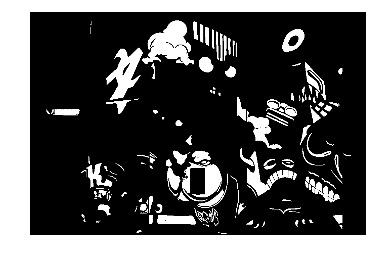

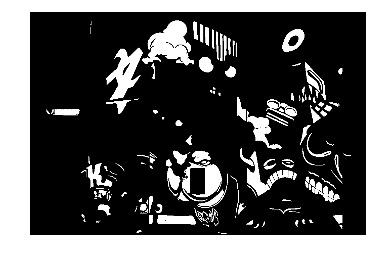

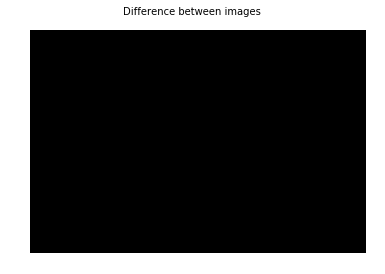

True


In [9]:
sr.show_image(islands_matlab)
sr.show_image(regions['islands'])
print(sr.image_diff(islands_matlab, regions['islands'] ))


In [10]:
assert det.lam == lam

{'holes': 76, 'indentations': 107, 'protrusions': 89, 'islands': 151}


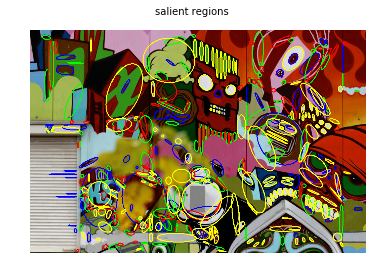

In [11]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'holes': 76, 'indentations': 77, 'protrusions': 89, 'islands': 151}


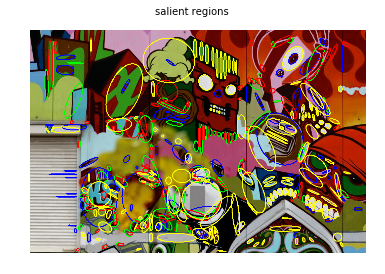

In [12]:
#sr.read_matfile('../tests/features/Color/color_allregions.mat', 
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/features/Color/color_allregions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsra, features_standard_dmsra, features_poly_dmsra = sr.binary_mask2ellipse_features(regions_dmsra, 
                                                                                connectivity=connectivity)
print(num_regions_dmsra)
sr.visualize_elements_ellipses(img, features_standard_dmsra);

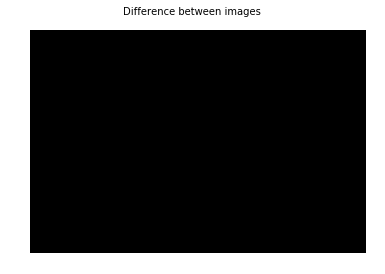

True


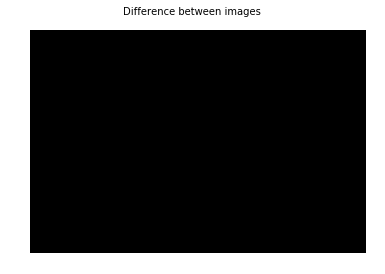

True


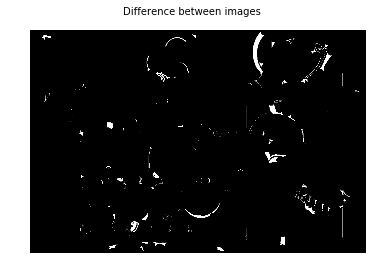

False


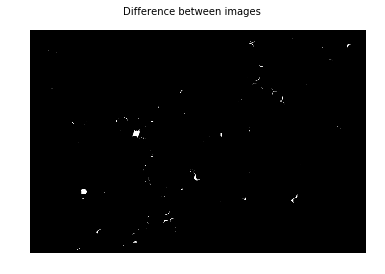

False


In [13]:
print(sr.image_diff(regions['holes'], holes_true))
print(sr.image_diff(regions['islands'], islands_true))
print(sr.image_diff(regions['indentations'], indents_true))
print(sr.image_diff(regions['protrusions'], prots_true))

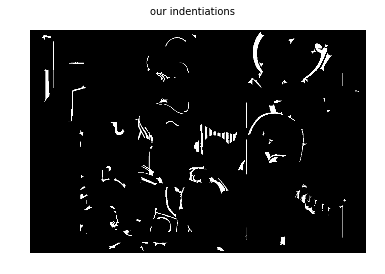

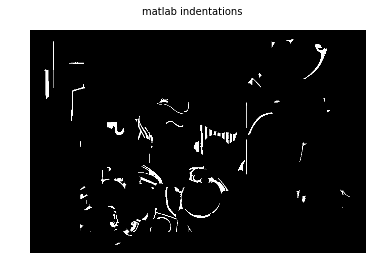

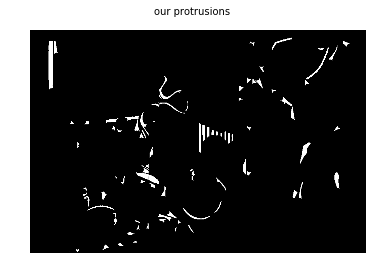

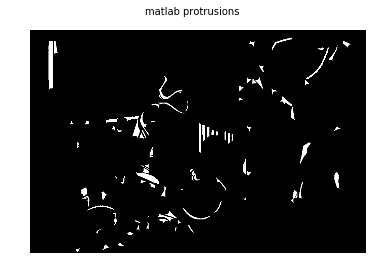

In [14]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)